# What we will cover in this module:
* 1.Data (prepare and load).
* 2.Build model.
* 3.Fitting the model to data (training).
* 4.Making predictions and evaluating a model (inference).
* 5.Saving and loading a model.
* 6.Putting it all together.

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
print(torch.__version__) # check version

2.5.1+cu121


## Data preparing and loading:
#### Data can be almost anything... in machine learning.
* Excel spreadsheet.
* Images of any kind.
* Videos (Youtube has a lots of data..).
* Audio like songs or podcasts.
* DNA.
* Text.
#### Machine learning is a game of two parts:
* Get data into a numerical representation.
* Build a model to learn patterns in that numerical representation.
#### To showcase this, let's create some * Known * data using the linear regression.
#### We'll use a linear regression formula to make a straight line with known ** Parameters **.

In [2]:
bias = 0.7    # both bias and weight are parameters
weight = 0.3

X = torch.arange(start = 0, end=1, step = 0.02 ).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.7000],
         [0.7060],
         [0.7120],
         [0.7180],
         [0.7240],
         [0.7300],
         [0.7360],
         [0.7420],
         [0.7480],
         [0.7540]]))

In [3]:
# length of X and y
len(X), len(y)

(50, 50)

## Splitting our data into training and test sets ( possibly the most important concept in machine learning).

In [4]:
# Step 1: Define the training split ratio
train_split = int(0.8 * len(X))  # 80% of the dataset will be used for training

# Step 2: Split the dataset into training and testing sets
X_train, y_train = X[:train_split], y[:train_split]  # First 80% for training
X_test, y_test = X[train_split:], y[train_split:]    # Remaining 20% for testing

# Step 3: Print the lengths of each dataset
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Building a function to visualize our data:

In [5]:
def plot_predictions( train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = None):
    """
    plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s = 4, label = "Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s = 20, label = "Testing data", )

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label= "predictions")
    # Show the legend
    plt.legend(prop = {"size": 14})



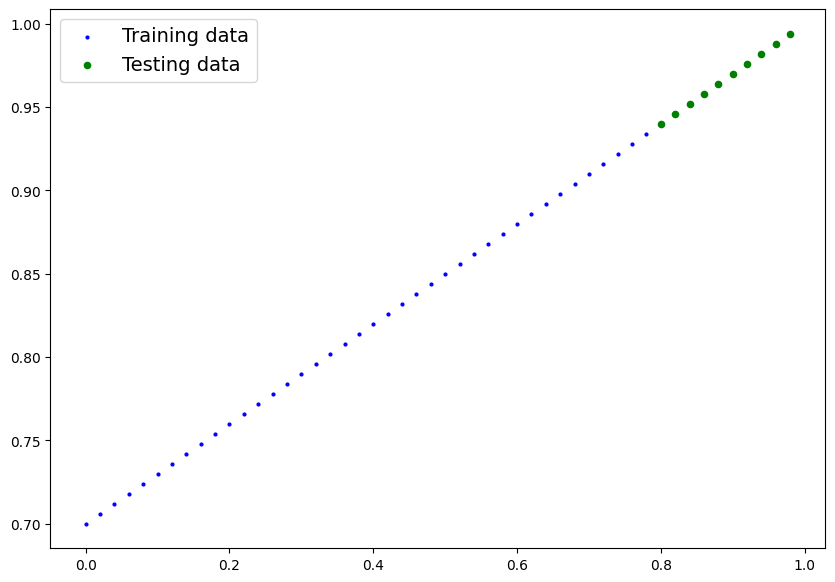

In [6]:
plot_predictions() # call the function

# Creating our first PyTorch model for linear regression:
* What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to )
* the ideal values (the weight and bias values we used to create the data.
* How does it do so?
* Throught two main algorithms:
* 1. Gradient descent
  2. Backprogation

In [7]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):  # almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # start with random weight and try to adjust it to the ideal weight
                                                requires_grad=True, 
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,   # start with a random bias and try to adjust it to the ideal bias 
                                             requires_grad=True, # can this parameter be updated via gradient descent
                                             dtype=torch.float)) # PyTorch loves the datatype torch.float32
        # Forward method to define the computation in the model 
    def forward(self, x:torch.Tensor) -> torch.Tensor:  # <- 'x' is the input data
        return self.weights * x + self.bias   # This is the linear regression formula
        
        

# Discussing some of the most important PyTorch model building classes:
## PyTorch model building essentials:
* torch.nn --> contains all of the buildings for computational graphs (a neural network can be considered a computational   graph).
* torch.nn.Parameter --> what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module --> The base class for all neural network modules, if you subclass it, you should overwrite forward().
* torch.optim --> this where the optimizers in PyTorch live, they will help with gradient descent.
* def forward() --> All nn.Module subsclasses require you to overwrite forward(), this method defines what happens in the
  forward computation.

# Checking out the internals of our PyTorch model:
* Now we've created a model, let's see what's inside...
* So we can check our model parameters or what's inside our model using .parameters().
* 

In [8]:
# Create a random seed
torch.manual_seed(42) # when use this we get every time same random value.

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias # that is our ideal value of weight and bias above cell[2]

(0.3, 0.7)

# Making predictions with our random model using torch.inference_model()
* To check our model's predictive power, let's see how well it predicts y_test based on X_test.
* When we pass data through our model, it's going to run it through the forward() method.

In [11]:
# Gradient computation is not disable
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

* The torch.inference_mode() context disables gradient computation and reduces memory usage, making inference more efficient.
* Inside this block, model_0(X_test) performs a forward pass on X_test without tracking gradients,
* The model makes predictions (y_preds) based on X_test.
* No gradients are stored, improving speed and memory efficiency.
* This is useful for inference tasks like evaluating models on test data.

In [12]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

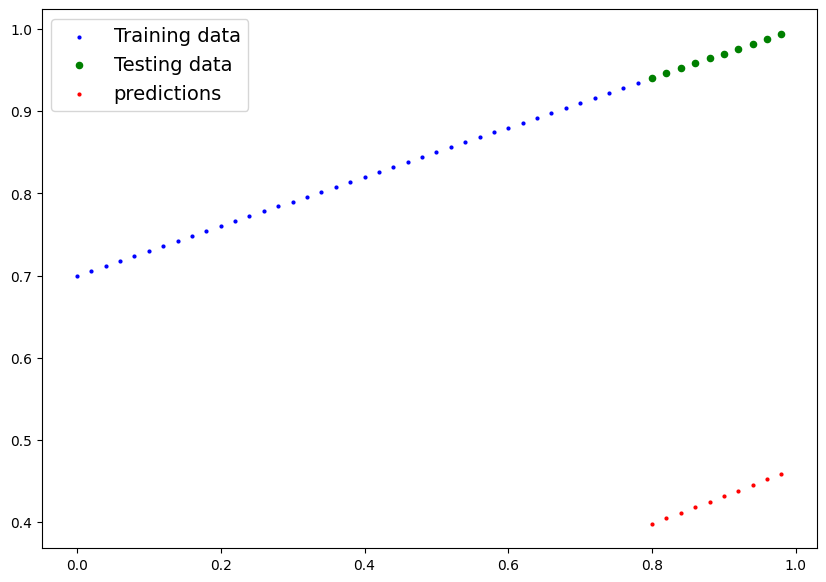

In [13]:
# Visualize the data
plot_predictions(predictions = y_preds)

# Training a model with PyTorch (intuition building):
* The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known        parameter.
* Or in other words from a poor representation of the data to a better representation of the data.
* One way to measure how poor or how wrong your models predictions are is to use a loss functions.
* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to
  refer to it as a loss function.
  Things we need to train:
### Loss function: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
### Optimizer: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias). in our       class to improve the loss function.
* Inside the optimizer you'll often have to set two parameters:
  ##### 1.params - the model parameters you'd like to optimize for example params=model_0.parameters().
  ##### 2.lr (learning rate) - the learning rate is a hyperparameter that define how big/small the optimzer changes the parameters
  And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# Check out our model's parameters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Setting up a loss function and optimizer with PyTorch:
* Creates a criterion that measures the mean absolute error (MAE) between each element in the input x and target y.
* MAE (nn.L1Loss).

In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)  # lr = learning rate the most important hyperparameter you can set


##### Q: Which loss function and optimizer should i use?
##### A: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
 ##### For example, for a regression problem(like ours), a loss function of nn.L1Loss() and an optimizer like 
##### torch.optim.SGD() will suffice.
##### But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a #####   loss function of nn.BCELoss() (binary cross entropy loss).

# Building a training loop ( and a testing loop ) in PyTorch:
#### A couple of things we need in a training loop:
* 1. Loop throug the data.
  2. Forward pass ( this involves data moving through our model's `forward()` functions ) to make predictions on data - also called forward propagation.
  3. Calculate the loss ( compare forward pass predictions to ground truth labels ).
  4. Optimizer zero grad.
  5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropagation).
  6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent).

In [17]:
# An epoch is one loop through the data.....(this is a hyperparameter because we'hv set it ourselves)
epochs = 200

# Create empty loss lists to track values

epoch_count = []
train_loss_values = []
test_loss_values = []

### Training
 # 1. loop through the data
for epoch in range(epochs):
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 2.Forward pass
    y_pred = model_0(X_train)

    # 3.Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 4.Optimizer zero grad
    optimizer.zero_grad()

    # 5.Perform backpropagation on the loss with respect to the parameters of the model.
    loss.backward()
    
    # 6.Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so...we have to them above in step 3 for the next iteration of the loop  
   
    
    model_0.eval() # turns off gradient tracking
    with torch.inference_mode(): # turns off gradient tracking and a couple of more things behind the scenes.
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0 :
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE loss: {loss} | MAE Test loss: {test_loss}")
    
    

Epoch: 0 | MAE loss: 0.556881308555603 | MAE Test loss: 0.5250651240348816
Epoch: 10 | MAE loss: 0.44167131185531616 | MAE Test loss: 0.3903551697731018
Epoch: 20 | MAE loss: 0.32646140456199646 | MAE Test loss: 0.2556453347206116
Epoch: 30 | MAE loss: 0.21125154197216034 | MAE Test loss: 0.12093551456928253
Epoch: 40 | MAE loss: 0.09604163467884064 | MAE Test loss: 0.014558094553649426
Epoch: 50 | MAE loss: 0.04522073268890381 | MAE Test loss: 0.08176179975271225
Epoch: 60 | MAE loss: 0.03982054069638252 | MAE Test loss: 0.08882363885641098
Epoch: 70 | MAE loss: 0.03630153089761734 | MAE Test loss: 0.08398555219173431
Epoch: 80 | MAE loss: 0.03286397457122803 | MAE Test loss: 0.076400026679039
Epoch: 90 | MAE loss: 0.02943551540374756 | MAE Test loss: 0.06812767684459686
Epoch: 100 | MAE loss: 0.025997888296842575 | MAE Test loss: 0.05985529348254204
Epoch: 110 | MAE loss: 0.02256198786199093 | MAE Test loss: 0.05226977914571762
Epoch: 120 | MAE loss: 0.019133061170578003 | MAE Test l

## Plot the loss curve

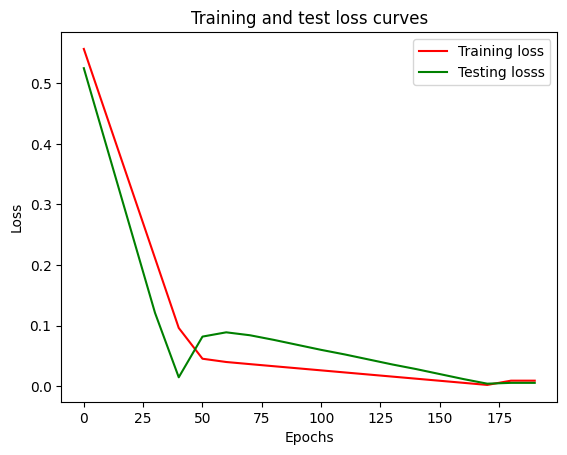

In [18]:
plt.plot(epoch_count, train_loss_values, c='r', label = "Training loss")
plt.plot(epoch_count, test_loss_values, c='g', label = "Testing losss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

🔹 Example:
Imagine you're guessing test answers before checking the textbook.

X_train = The question.
y_pred = Your guess.
y_train = The correct answer.

In [19]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3018])), ('bias', tensor([0.6903]))])

In [21]:
weight, bias

(0.3, 0.7)

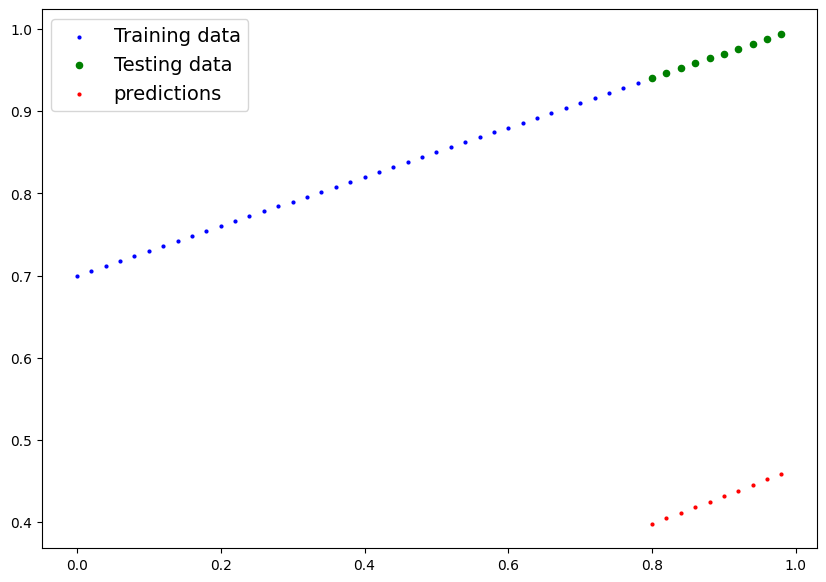

In [22]:
plot_predictions(predictions=y_preds)

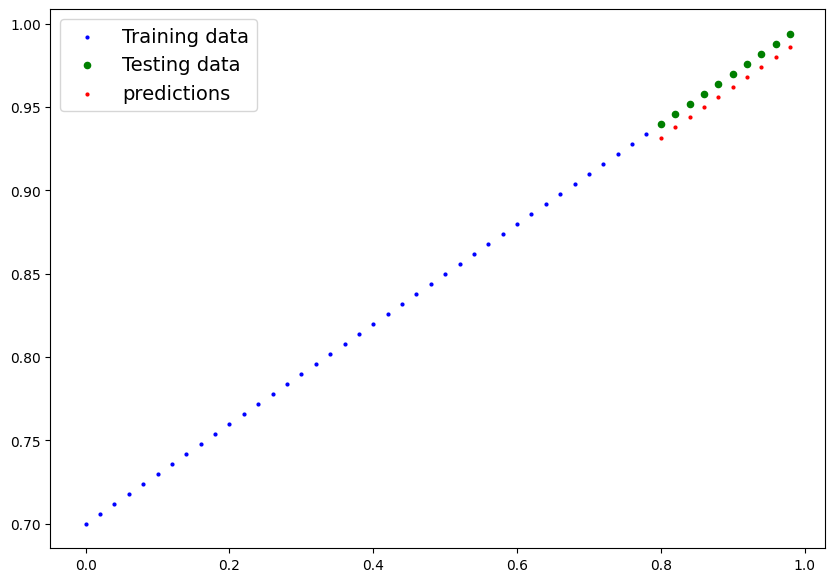

In [23]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch
There are three main methods you should about for saving and loading models in PyTorch.
### 1.torch.save() - allows you save a PyTorch object in Python's pickle formate.
### 2.torch.load() - allows you load a saved PyTorch object.
### 3.torch.nn.Module.load_state_dict() - this allows to load a model's saved state dictionary.

In [24]:
checkpoint = {
    'model_state_dict': model_0.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}


torch.save(checkpoint, 'checkpoint.pth')

print("Model saved successfully!")

Model saved successfully!


In [25]:
import os
print(os.listdir("/kaggle/working/"))


['.virtual_documents', 'checkpoint.pth']


##### Use weights_only=True if you only need model weights.
##### Use weights_only=False only if you need the optimizer state, training info, etc.

In [26]:
# Load the checkpoint
checkpoint = torch.load('checkpoint.pth', weights_only=False)

# Restore model and optimizer states
model_0.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

print("Model loaded successfully!")
print(checkpoint)

Model loaded successfully!
{'model_state_dict': OrderedDict([('weights', tensor([0.3018])), ('bias', tensor([0.6903]))]), 'optimizer_state_dict': {'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]}}


In [27]:
!ls


checkpoint.pth


In [28]:
from pathlib import Path


# Create directory to save the model
MODEL_PATH = Path("/kaggle/working/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Define model save path
MODEL_NAME = "linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state_dict
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved at: {MODEL_SAVE_PATH}")



Model saved at: /kaggle/working/models/linear_regression_model.pth


In [29]:
# Instantiate the same model architecture
loaded_model = LinearRegressionModel()

# Load the state_dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

# Set to evaluation mode
loaded_model.eval()

print("Model loaded successfully!")


Model loaded successfully!


In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3018])), ('bias', tensor([0.6903]))])

In [31]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.3018])), ('bias', tensor([0.6903]))])

In [32]:
# Make some predictions with our loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
    
loaded_model_preds

tensor([[0.9317],
        [0.9378],
        [0.9438],
        [0.9499],
        [0.9559],
        [0.9619],
        [0.9680],
        [0.9740],
        [0.9800],
        [0.9861]])

In [33]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.9317],
        [0.9378],
        [0.9438],
        [0.9499],
        [0.9559],
        [0.9619],
        [0.9680],
        [0.9740],
        [0.9800],
        [0.9861]])

In [34]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together:
### Let's go back through the steps above and see it all in one place.

In [35]:
# import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu121'

## Create device-agnostic code
#### This mean if we've got access to a GPU, our code will use it (for potentially faster computing).
#### If no GPU is available, the code will default to using CPU

In [36]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


# 6.1 Data ( preparing and loading)

In [37]:
weight = 0.8 
bias = 0.2

X = torch.arange(start = 0, end = 1, step = 0.02).unsqueeze(dim=1)

y = weight * X + bias

X[:10], y[0:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440]]))

#### 6.1.1: Splitting

In [38]:
train_split = int(0.8 * len(X))

X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [39]:
def plot_predictions( train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test, 
                      test_labels = y_test,
                      predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="r", s=4, label= "Training data")
    plt.scatter(test_data, test_labels, c="g", s=10, label= "Testing data")

    if predictions is not None:
      plt.scatter(test_data, predictions, c="b", s=10, label= "Prediction")
    plt.legend(prop={"size":14})

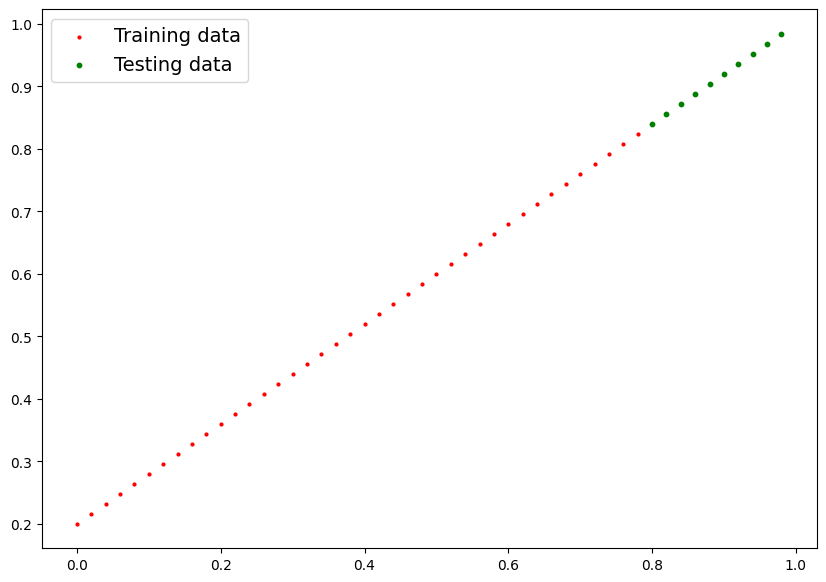

In [40]:
plot_predictions()

## Building a PyTorch Linear Model

In [41]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called : Linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
# set the manual seed
torch.manual_seed(42)

In [42]:
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

## 6.3.3 Training a model
### For training we need:
### Loss function
### Optimizer
### Training loop
### Testing loop

In [43]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [44]:
# Set the model to use the target device
model_1.to(device) # convert to gpu
next(model_1.parameters()).device

device(type='cuda', index=0)

In [45]:
# Setup loss function
loss_fn = nn.L1Loss() # MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), 
                            lr = 0.01)
print("Done")

Done


In [46]:
# Let's write a trainning loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

   # 1. Forward passs
    y_pred = model_1(X_train)

   # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

   # 3. optimizer zero grad
    optimizer.zero_grad()
   
   # 4. perform backpropagation
    loss.backward()

   # 5. optimizer step
    optimizer.step()

### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

# print out what is happening
    if epoch % 10 == 0:
         print(f"Epoch {epoch} | train_loss: {loss} | test_loss: {test_loss}")

Epoch 0 | train_loss: 0.6161779165267944 | test_loss: 0.5849762558937073
Epoch 10 | train_loss: 0.5009680986404419 | test_loss: 0.45026642084121704
Epoch 20 | train_loss: 0.3857581913471222 | test_loss: 0.3155565857887268
Epoch 30 | train_loss: 0.2705483138561249 | test_loss: 0.180846706032753
Epoch 40 | train_loss: 0.15533843636512756 | test_loss: 0.046136897057294846
Epoch 50 | train_loss: 0.05875825881958008 | test_loss: 0.06886561214923859
Epoch 60 | train_loss: 0.04580378159880638 | test_loss: 0.09473040699958801
Epoch 70 | train_loss: 0.041819483041763306 | test_loss: 0.09405827522277832
Epoch 80 | train_loss: 0.03831038996577263 | test_loss: 0.08853326737880707
Epoch 90 | train_loss: 0.034879546612501144 | test_loss: 0.08094760775566101
Epoch 100 | train_loss: 0.03144557774066925 | test_loss: 0.07267507165670395
Epoch 110 | train_loss: 0.028006771579384804 | test_loss: 0.06440252810716629
Epoch 120 | train_loss: 0.024577612057328224 | test_loss: 0.056816864758729935
Epoch 130 | 

In [47]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [48]:
weight, bias

(0.8, 0.2)

In [49]:
print(X_test.shape, y_pred.shape, X_train.shape)


torch.Size([10, 1]) torch.Size([40, 1]) torch.Size([40, 1])


# Making and evaluating predictions

In [50]:
# Turn model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8484],
        [0.8644],
        [0.8804],
        [0.8964],
        [0.9123],
        [0.9283],
        [0.9443],
        [0.9603],
        [0.9762],
        [0.9922]], device='cuda:0')

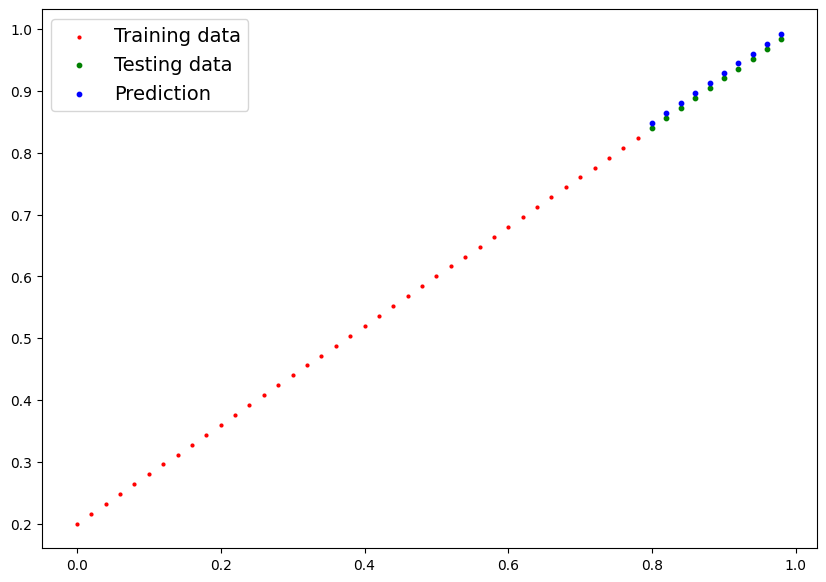

In [51]:
# Check out our model predictions visually
plot_predictions(predictions = y_preds.cpu())

## 6.5 saving and loading a trained model

In [52]:
from pathlib import Path


# Create directory to save the model
MODEL_PATH = Path("/kaggle/working/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Define model save path
MODEL_NAME = "linear_regression_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state_dict
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved at: {MODEL_SAVE_PATH}")



Model saved at: /kaggle/working/models/linear_regression_model_1.pth


In [53]:
# Instantiate the same model architecture
loaded_model = LinearRegressionModelV2()

# Load the state_dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

# Set to evaluation mode
loaded_model.eval()

print("Model loaded successfully!")


Model loaded successfully!


In [54]:
# Check the device
next(loaded_model.parameters()).device

device(type='cpu')

In [55]:
# Change the device
loaded_model = loaded_model.to(device)

In [56]:
# Check the device
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [57]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [58]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

# Practice 

In [59]:
# import the important library
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cu121'

In [60]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")


Device: cuda


In [61]:
# Create ideal model
weight = 0.9
bias = 0.1

X = torch.arange(0, 1, 0.01, device = device).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]], device='cuda:0'),
 tensor([[0.1000],
         [0.1090],
         [0.1180],
         [0.1270],
         [0.1360],
         [0.1450],
         [0.1540],
         [0.1630],
         [0.1720],
         [0.1810]], device='cuda:0'))

In [62]:
len(X), len(y)

(100, 100)

In [63]:
# splitting data 
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [64]:
# plotting
def plot_predictions ( train_data = X_train,
                       train_labels = y_train,
                       test_data = X_test,
                       test_labels = y_test,
                       predictions = None):
    train_data = train_data.cpu().numpy()
    train_labels = train_labels.cpu().numpy()
    test_data = test_data.cpu().numpy()
    test_labels = test_labels.cpu().numpy()
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label= "Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=6, label = "Prediction")
    plt.legend(prop={"size":14})

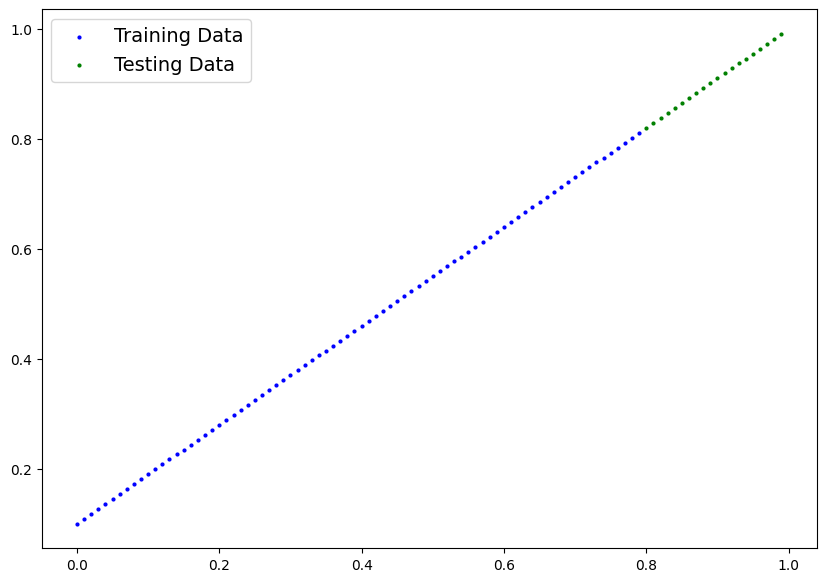

In [65]:
plot_predictions()

In [66]:
# build a mode
class LinearRegressionModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_3 = LinearRegressionModelV3()
model_3, model_3.state_dict()

(LinearRegressionModelV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [67]:
# check model device
next(model_3.parameters()).device

device(type='cpu')

In [68]:
model_3.to(device) # change into gpu
next(model_3.parameters()).device

device(type='cuda', index=0)

In [69]:
# make prediction with model
with torch.inference_mode():
    y_preds = model_3(X_test)

y_preds

tensor([[1.4416],
        [1.4493],
        [1.4569],
        [1.4646],
        [1.4722],
        [1.4799],
        [1.4875],
        [1.4952],
        [1.5028],
        [1.5104],
        [1.5181],
        [1.5257],
        [1.5334],
        [1.5410],
        [1.5487],
        [1.5563],
        [1.5640],
        [1.5716],
        [1.5793],
        [1.5869]], device='cuda:0')

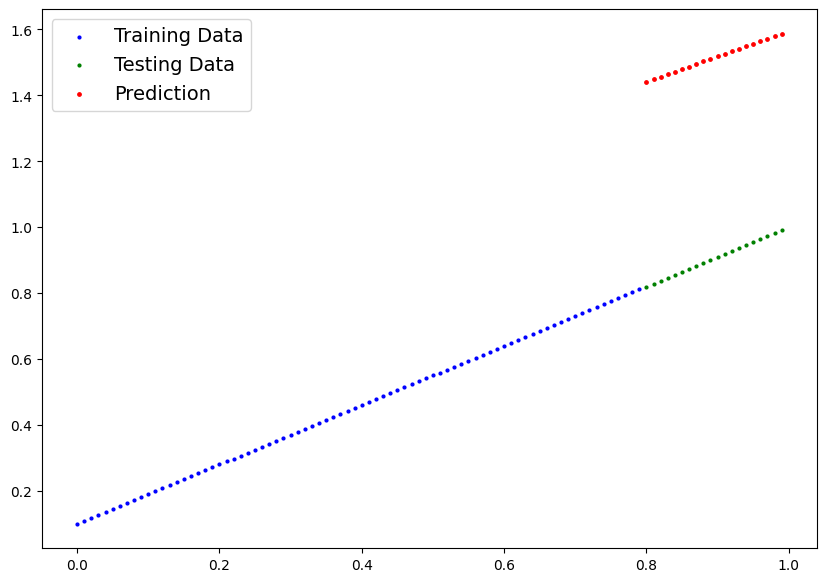

In [70]:
plot_predictions(predictions = y_preds.cpu())

In [71]:
# train the model
loss_fn = nn.L1Loss() # MAE

optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.01)

In [72]:
torch.manual_seed(42)

epochs = 300 
epoch_count = []
train_loss_values = []
test_loss_values = []
for epoch in range(epochs):
    model_3.train()
    y_pred = model_3(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()

    with torch.inference_mode():
      test_preds = model_3(X_test)
      test_loss = loss_fn(test_preds, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.cpu().detach().numpy())
      test_loss_values.append(test_loss.cpu().detach().numpy())
      print(f"epoch:{epoch} | MAE train loss:{loss} | MAE test loss: {test_loss}")
    

epoch:0 | MAE train loss:0.676500678062439 | MAE test loss: 0.5952346920967102
epoch:10 | MAE train loss:0.5608982443809509 | MAE test loss: 0.4598822593688965
epoch:20 | MAE train loss:0.4452958106994629 | MAE test loss: 0.32452985644340515
epoch:30 | MAE train loss:0.32969340682029724 | MAE test loss: 0.18917743861675262
epoch:40 | MAE train loss:0.21409101784229279 | MAE test loss: 0.05382503196597099
epoch:50 | MAE train loss:0.1050596758723259 | MAE test loss: 0.07396646589040756
epoch:60 | MAE train loss:0.07526029646396637 | MAE test loss: 0.1265403926372528
epoch:70 | MAE train loss:0.06799234449863434 | MAE test loss: 0.1421944946050644
epoch:80 | MAE train loss:0.0639626681804657 | MAE test loss: 0.14359962940216064
epoch:90 | MAE train loss:0.06044904515147209 | MAE test loss: 0.1390676647424698
epoch:100 | MAE train loss:0.057022031396627426 | MAE test loss: 0.1314200758934021
epoch:110 | MAE train loss:0.05359501764178276 | MAE test loss: 0.12377249449491501
epoch:120 | MA

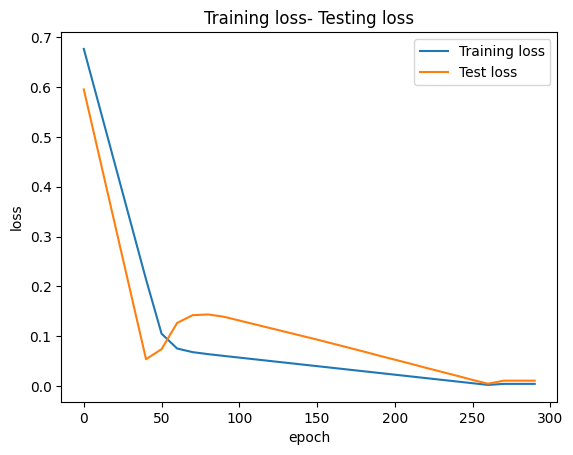

In [73]:
# train-test loss
plt.plot(epoch_count, train_loss_values, label = "Training loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training loss- Testing loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend();

In [74]:
weight, bias

(0.9, 0.1)

In [75]:
model_3.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8970]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1055], device='cuda:0'))])

In [76]:
# prediction
model_3.eval()

with torch.inference_mode():
    y_preds = model_3(X_test)

y_preds

tensor([[0.8231],
        [0.8320],
        [0.8410],
        [0.8500],
        [0.8590],
        [0.8679],
        [0.8769],
        [0.8859],
        [0.8948],
        [0.9038],
        [0.9128],
        [0.9217],
        [0.9307],
        [0.9397],
        [0.9487],
        [0.9576],
        [0.9666],
        [0.9756],
        [0.9845],
        [0.9935]], device='cuda:0')

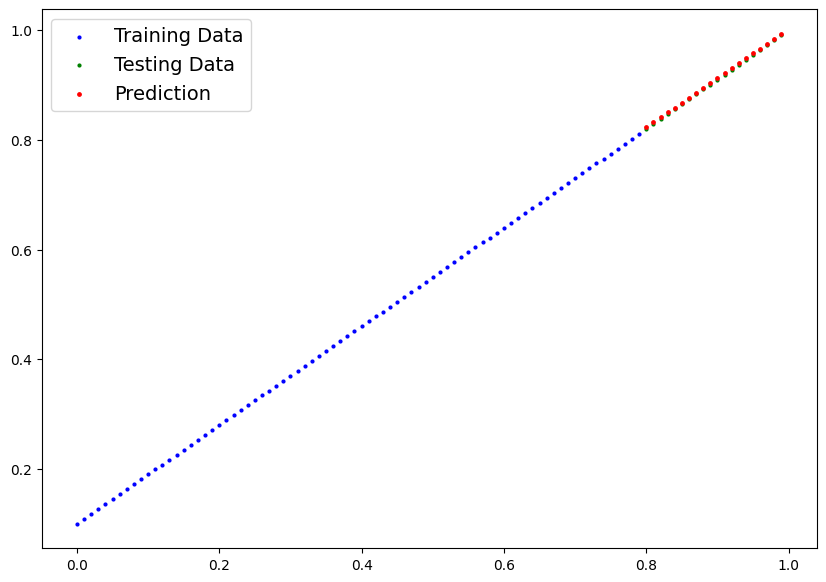

In [77]:
plot_predictions(predictions = y_preds.cpu())

In [78]:
# saving and loading
from pathlib import Path


# Create directory to save the model
MODEL_PATH = Path("/kaggle/working/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Define model save path
MODEL_NAME = "linear_regression_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state_dict
torch.save(model_3.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved at: {MODEL_SAVE_PATH}")



Model saved at: /kaggle/working/models/linear_regression_model_3.pth


In [79]:
# Instantiate the same model architecture
loaded_model = LinearRegressionModelV3()

# Load the state_dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

# Set to evaluation mode
loaded_model.eval()

print("Model loaded successfully!")


Model loaded successfully!


In [80]:
next(loaded_model.parameters()).device

device(type='cpu')

In [81]:
list(loaded_model.parameters())

[Parameter containing:
 tensor([[0.8970]], requires_grad=True),
 Parameter containing:
 tensor([0.1055], requires_grad=True)]